# Importing libraries nad exploring the Dataset

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import plotly.tools as tls
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import seaborn as sns

In [77]:
my_data=pd.read_csv("/home/saumitra/Desktop/kaggle/Mass_Shooting.csv",encoding='latin-1')

In [78]:
pd.set_option('max_columns',None)

In [79]:
my_data.head(3)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN


In [80]:
my_data.describe()

,S#,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Latitude,Longitude
count,323.000000,323.000000,323.000000,323.000000,317.000000,67.000000,303.000000,303.000000
mean,162.000000,4.436533,6.176471,10.263158,0.129338,0.626866,37.225076,-94.429539
std,93.386294,5.783208,29.889182,33.662309,0.610294,0.487288,5.536365,16.513296
min,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,21.325512,-161.792752
25%,81.500000,1.000000,1.000000,4.000000,0.000000,0.000000,33.571459,-110.205485
50%,162.000000,3.000000,3.000000,5.000000,0.000000,1.000000,36.443290,-88.122998
75%,242.500000,5.500000,5.000000,9.000000,0.000000,1.000000,41.483844,-81.703237
max,323.000000,59.000000,527.000000,585.000000,5.000000,1.000000,60.790539,-69.707823


In [81]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323 entries, 0 to 322
Data columns (total 21 columns):
S#                      323 non-null int64
Title                   323 non-null object
Location                278 non-null object
Date                    323 non-null object
Incident Area           261 non-null object
Open/Close Location     295 non-null object
Target                  318 non-null object
Cause                   246 non-null object
Summary                 323 non-null object
Fatalities              323 non-null int64
Injured                 323 non-null int64
Total victims           323 non-null int64
Policeman Killed        317 non-null float64
Age                     179 non-null object
Employeed (Y/N)         67 non-null float64
Employed at             41 non-null object
Mental Health Issues    323 non-null object
Race                    321 non-null object
Gender                  323 non-null object
Latitude                303 non-null float64
Longitude         

In [82]:
my_data.isnull().sum()

S#                        0
Title                     0
Location                 45
Date                      0
Incident Area            62
Open/Close Location      28
Target                    5
Cause                    77
Summary                   0
Fatalities                0
Injured                   0
Total victims             0
Policeman Killed          6
Age                     144
Employeed (Y/N)         256
Employed at             282
Mental Health Issues      0
Race                      2
Gender                    0
Latitude                 20
Longitude                20
dtype: int64

### converting Date from one type to another type

In [83]:
from datetime import datetime
my_data['Date']=pd.to_datetime(my_data['Date'])

In [84]:
my_data.Date.head()

0   2017-11-05
1   2017-11-01
2   2017-10-18
3   2017-10-01
4   2017-06-14
Name: Date, dtype: datetime64[ns]

### separating year and month

In [85]:
my_data['Shooting_year']=my_data['Date'].dt.year
my_data['Shooting_month']=my_data['Date'].dt.month

In [86]:
my_data.head(3)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Shooting_year,Shooting_month
0,1,Texas church mass shooting,"Sutherland Springs, TX",2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN,2017,11
1,2,Walmart shooting in suburban Denver,"Thornton, CO",2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN,2017,11
2,3,Edgewood businees park shooting,"Edgewood, MD",2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN,2017,10


In [87]:
my_data.Title.head(20)

0               Texas church mass shooting
1      Walmart shooting in suburban Denver
2          Edgewood businees park shooting
3            Las Vegas Strip mass shooting
4               San Francisco UPS shooting
5        Pennsylvania supermarket shooting
6     Florida awning manufacturer shooting
7         Rural Ohio nursing home shooting
8                 Fresno downtown shooting
9         Fort Lauderdale airport shooting
10                   Cascade Mall shooting
11             Baton Rouge police shooting
12                  Dallas police shooting
13              Orlando nightclub massacre
14                   Ferguson, MO Drive by
15          Forestville, Maryland Drive-by
16                      Halifax County, VA
17        Tire-Slashing revenge escalation
18              Chicago Rap video Shootout
19             Texas family murder-suicide
Name: Title, dtype: object

In [88]:
my_data['loc1']=my_data.Title.str.extract('([A-Za-z]+, [A-Za-z]+)',expand=False)

In [89]:
my_data['loc2']=my_data.Title.str.extract('([A-Za-z]+)',expand=False)

In [90]:
my_data.loc[:,['loc1','loc2']].head(20)

,loc1,loc2
0,NaN,Texas
1,NaN,Walmart
2,NaN,Edgewood
3,NaN,Las
4,NaN,San
5,NaN,Pennsylvania
6,NaN,Florida
7,NaN,Rural
8,NaN,Fresno
9,NaN,Fort


In [91]:
for i in range(len(my_data)):
    if pd.isnull(my_data.loc[i,'Location']):
        my_data.loc[i,'Location1']=my_data.loc[i,'loc1']
        if pd.isnull(my_data['Location1'][i]):
            my_data.loc[i,'Location1']=my_data.loc[i,'loc2']
    else:
        my_data.loc[i,'Location1']=my_data.loc[i,'Location']

In [92]:
my_data=my_data.drop(['loc1','loc2','Location'],axis=1)

In [93]:
my_data.rename(columns={'Location1':'Location'},inplace=True)

In [94]:
my_data.head()

,S#,Title,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Shooting_year,Shooting_month,Location
0,1,Texas church mass shooting,2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN,2017,11,"Sutherland Springs, TX"
1,2,Walmart shooting in suburban Denver,2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN,2017,11,"Thornton, CO"
2,3,Edgewood businees park shooting,2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN,2017,10,"Edgewood, MD"
3,4,Las Vegas Strip mass shooting,2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132,2017,10,"Las Vegas, NV"
4,5,San Francisco UPS shooting,2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN,2017,6,"San Francisco, CA"


In [95]:
my_data['State']=my_data['Location'].str.rpartition(',')[2]
my_data['State'][my_data.State.str.len()==3].value_counts().head(10)

 CA    5
 VA    3
 NM    2
 WA    2
 LA    2
 PA    1
 TX    1
 NJ    1
 TN    1
 NV    1
Name: State, dtype: int64

In [96]:
my_data['State'].replace([' CA',' VA',' WA',' NM',' LA',' GA',' MD',' FL',' CO',' TX',' PA',' TN',' AZ',' NV',' AL',' DE',' NJ'],
                           ['California','Virginia','Washington','New Mexico','Louisiana','Georgia','Maryland','Florida',
                            'Colorado','Texas','Pennsylvania','Tennessee','Arizona','Nevada','Alabama','Delaware','New Jersey'], inplace=True)

In [97]:
my_data.State.value_counts().head()

 California    29
 Florida       21
 Texas         16
 Washington    14
 Georgia       14
Name: State, dtype: int64

### Cleaning column Gender

In [98]:
my_data.Gender.value_counts()

Male           272
Unknown         21
M               20
Female           5
Male/Female      4
M/F              1
Name: Gender, dtype: int64

In [99]:
my_data.Gender.replace(['M','M/F'],['Male','Male/Female'],inplace=True)

In [100]:
my_data.Gender.value_counts()

Male           292
Unknown         21
Male/Female      5
Female           5
Name: Gender, dtype: int64

### Cleaning column Race

In [101]:
my_data.Race.value_counts()

White American or European American                    122
Black American or African American                      76
Unknown                                                 42
Some other race                                         20
white                                                   12
Asian American                                          11
White                                                    9
Asian                                                    6
Latino                                                   5
Black                                                    5
black                                                    3
Native American or Alaska Native                         3
Other                                                    2
Two or more races                                        2
Asian American/Some other race                           1
Black American or African American/Unknown               1
White American or European American/Some other Race     

In [102]:
my_data['Race'].replace(['White American or European American', 'white', 'White American or European American/Some other Race'], ['White', 'White', 'White'], inplace=True)
my_data['Race'].replace(['Black American or African American', 'black', 'Black American or African American/Unknown'], ['Black', 'Black', 'Black'], inplace=True)
my_data['Race'].replace(['Asian', 'Asian American/Some other race'], ['Asian American', 'Asian American'], inplace=True)
my_data['Race'].replace(['Unknown', 'Some other race', 'Two or more races'], ['Other', 'Other' ,'Other'], inplace=True)
my_data['Race'].replace(['Native American or Alaska Native'], ['Native American'], inplace=True)

In [103]:
my_data.Race.value_counts()

White              144
Black               85
Other               66
Asian American      18
Latino               5
Native American      3
Name: Race, dtype: int64

### Cleaning column Mental Health Issues

In [104]:
my_data['Mental Health Issues'].value_counts()

Unknown    110
Yes        106
No          93
Unclear     13
unknown      1
Name: Mental Health Issues, dtype: int64

In [105]:
my_data['Mental Health Issues'].replace(['unknown','Unclear'],['Unknown','Unknown'],inplace=True)

In [106]:
my_data['Mental Health Issues'].value_counts()

Unknown    124
Yes        106
No          93
Name: Mental Health Issues, dtype: int64

### Cleaning column Incident Area

In [107]:
my_data['Incident Area'].value_counts()

Home                                              43
Workplace                                          8
Home+School                                        7
Church                                             5
Club                                               4
street                                             4
School                                             3
Fort Hood Army Post                                3
Shopping Mall                                      3
Bart Township                                      2
restaurant                                         2
Movie Theatre                                      2
restaurant parking                                 2
outside the club                                   2
nightclub                                          2
Multiple Homes                                     2
outside the house                                  2
Coffee Shop                                        2
health clinic                                 

In [108]:
my_data['Area']=np.nan

In [109]:
my_data.loc[my_data['Incident Area'].str.contains('school',case=False,na=False),'Area']='School'
my_data.loc[my_data['Incident Area'].str.contains("University",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("college",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("dormitory",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("lecture",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("scool",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("academy",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("classroom",case=False, na=False), 'Area'] = 'School'
my_data.loc[my_data['Incident Area'].str.contains("apartment",case=False, na=False), 'Area'] = 'Home'
my_data.loc[my_data['Incident Area'].str.contains("house",case=False, na=False), 'Area'] = 'Home'
my_data.loc[my_data['Incident Area'].str.contains("home",case=False, na=False), 'Area'] = 'Home'
my_data.loc[my_data['Incident Area'].str.contains("shop",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Store",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Restaurant",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("salon",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("spa",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Cafe",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("grocery",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("mart",case=False, na=False), 'Area'] = 'Shop'
my_data.loc[my_data['Incident Area'].str.contains("Office",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("Company",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("work",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("conference",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("firm",case=False, na=False), 'Area'] = 'Work'
my_data.loc[my_data['Incident Area'].str.contains("street",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("lot",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("walk",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("highway",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("interstate",case=False, na=False), 'Area'] = 'Road'
my_data.loc[my_data['Incident Area'].str.contains("club",case=False, na=False), 'Area'] = 'Pub-Club'
my_data.loc[my_data['Incident Area'].str.contains("pub",case=False, na=False), 'Area'] = 'Pub-Club'
my_data.loc[my_data['Incident Area'].str.contains("gas",case=False, na=False), 'Area'] = 'Gas-Station'
my_data.loc[my_data['Incident Area'].str.contains("party",case=False, na=False), 'Area'] = 'Party'
my_data.loc[my_data['Incident Area'].str.contains("airport",case=False, na=False), 'Area'] = 'Airport'
my_data.loc[my_data['Incident Area'].str.contains("clinic",case=False, na=False), 'Area'] = 'Hospital'
my_data.loc[my_data['Incident Area'].str.contains("Hospital",case=False, na=False), 'Area'] = 'Hospital'
my_data.loc[my_data['Incident Area'].str.contains("church",case=False,na=False), 'Area'] = 'Religious'
my_data.loc[my_data['Incident Area'].str.contains("temple",case=False,na=False), 'Area'] = 'Religious'
my_data.loc[my_data['Incident Area'].str.contains("monastery",case=False,na=False), 'Area'] = 'Religious'
my_data.Area.fillna(my_data['Incident Area'],inplace=True)

In [110]:
my_data.Area.value_counts().head(15)

Home                   69
School                 48
Shop                   29
Work                   21
Pub-Club               16
Road                   11
Religious               8
Party                   7
Gas-Station             3
Fort Hood Army Post     3
Hospital                3
City Hall Building      2
Movie Theatre           2
Bart Township           2
Airport                 2
Name: Area, dtype: int64

### Cleaning column Target

In [111]:
my_data.Target.value_counts()

random                       140
Family                        37
Coworkers                     17
Students                      16
Students+Teachers             14
Ex-Coworkers                   9
party guests                   8
Policeman                      7
Ex-Wife                        7
coworkers                      5
Teachers                       5
neighbors                      4
Ex-Wife & Family               3
Ex-Girlfriend                  2
police                         2
school girls                   2
Children                       2
Friends                        2
lawyers                        1
black men                      1
hunters                        1
basketball players             1
Ex-GirlFriend                  1
club members                   1
protestors                     1
Trooper                        1
welding shop employees         1
Family+students                1
postmaster                     1
Family+random                  1
Contestant

In [112]:
my_data['FTarget']=np.nan
my_data.loc[my_data['Target'].str.contains("family",case=False,na=False),'FTarget'] = 'Family'
my_data.loc[my_data['Target'].str.contains("Ex-",case=False, na=False), 'FTarget'] = 'Family'
my_data.loc[my_data['Target'].str.contains("coworker",case=False, na=False), 'FTarget'] = 'Coworkers'
my_data.loc[my_data['Target'].str.contains("employee",case=False, na=False), 'FTarget'] = 'Coworkers'
my_data.loc[my_data['Target'].str.contains("Student",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("player",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("teacher",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("school",case=False, na=False), 'FTarget'] = 'School'
my_data.loc[my_data['Target'].str.contains("random",case=False, na=False), 'FTarget'] = 'Random'
my_data.FTarget.fillna(my_data['Target'],inplace=True)

In [113]:
my_data.FTarget.value_counts()

Random                       143
Family                        54
School                        40
Coworkers                     33
party guests                   8
Policeman                      7
neighbors                      4
Children                       2
police                         2
Friends                        2
women                          1
TSA Officer                    1
psychologist+psychiatrist      1
black men                      1
House Owner                    1
prayer group                   1
monks                          1
club members                   1
Social Workers                 1
Congresswoman                  1
lawyers                        1
protestors                     1
drug dealer                    1
Girlfriend                     1
hunters                        1
Contestant                     1
uninvited guests               1
Policeman+Council Member       1
birthday party bus             1
Trooper                        1
Sikhs     

### Cleaning column Cause

In [114]:
my_data.Cause.value_counts()

psycho                  68
terrorism               65
anger                   44
frustration             18
domestic dispute        12
revenge                 10
unemployement           10
racism                   6
unknown                  4
failing exams            3
robbery                  1
breakup                  1
suspension               1
drunk                    1
domestic disputer        1
religious radicalism     1
Name: Cause, dtype: int64

In [115]:
my_data.Cause.replace(['domestic disputer'],['domestic dispute'],inplace=True)

In [116]:
my_data.Cause.value_counts()

psycho                  68
terrorism               65
anger                   44
frustration             18
domestic dispute        13
revenge                 10
unemployement           10
racism                   6
unknown                  4
failing exams            3
robbery                  1
breakup                  1
suspension               1
drunk                    1
religious radicalism     1
Name: Cause, dtype: int64

Cleaning column Open/Close Location

In [117]:
my_data['Open/Close Location'].value_counts()

Close         197
Open           78
Open+Close     19
Open+CLose      1
Name: Open/Close Location, dtype: int64

In [118]:
my_data['Open/Close Location'].replace(['Open+CLose'],['Open+Close'],inplace=True)

### Cleaning column Age

In [119]:
my_data.Age.value_counts()

14       7
18       7
34       7
44       7
19       6
17       6
43       6
40       6
20       6
41       6
15       6
39       6
45       6
37       6
29       5
24       5
36       5
22       5
23       5
42       5
28       5
16       4
25       4
26       4
47       3
27       3
35       3
32       3
59       3
52       2
30       2
57       2
64       2
55       2
38       2
48       2
0        1
17,18    1
12       1
13       1
13,11    1
70       1
15,16    1
21       1
50       1
19,22    1
19,32    1
51       1
33       1
66       1
31       1
Name: Age, dtype: int64

In [120]:
my_data['Age1']=np.nan
my_data.loc[my_data['Age'].str.contains(',',case=False,na=False),'Age1']=my_data.Age.str.rpartition(',')[0]
my_data.Age1.fillna(my_data['Age'],inplace=True)

In [121]:
my_data.Age1.value_counts()

19    8
18    7
15    7
44    7
34    7
17    7
14    7
45    6
20    6
39    6
40    6
37    6
41    6
43    6
24    5
42    5
22    5
29    5
36    5
28    5
23    5
26    4
25    4
16    4
32    3
59    3
47    3
35    3
27    3
55    2
30    2
38    2
52    2
48    2
57    2
13    2
64    2
12    1
31    1
70    1
33    1
66    1
21    1
51    1
0     1
50    1
Name: Age1, dtype: int64

In [122]:
my_data=my_data.drop(['Age'],axis=1)

In [123]:
my_data.rename(columns={'Age1':'Age'},inplace=True)

In [124]:
my_data.head()

,S#,Title,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,Injured,Total victims,Policeman Killed,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude,Shooting_year,Shooting_month,Location,State,Area,FTarget,Age
0,1,Texas church mass shooting,2017-11-05,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,20,46,0.0,NaN,NaN,No,White,Male,NaN,NaN,2017,11,"Sutherland Springs, TX",Texas,Religious,Random,26
1,2,Walmart shooting in suburban Denver,2017-11-01,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,0,3,0.0,NaN,NaN,No,White,Male,NaN,NaN,2017,11,"Thornton, CO",Colorado,Shop,Random,47
2,3,Edgewood businees park shooting,2017-10-18,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,3,6,0.0,NaN,Advance Granite Store,No,Black,Male,NaN,NaN,2017,10,"Edgewood, MD",Maryland,Shop,Coworkers,37
3,4,Las Vegas Strip mass shooting,2017-10-01,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,527,585,1.0,NaN,NaN,Unknown,White,Male,36.181271,-115.134132,2017,10,"Las Vegas, NV",Nevada,Gas-Station,Random,64
4,5,San Francisco UPS shooting,2017-06-14,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,2,5,0.0,1.0,NaN,Yes,Asian American,Male,NaN,NaN,2017,6,"San Francisco, CA",California,UPS facility,Coworkers,38


# Creating new Dataframe

In [125]:
new_data=pd.DataFrame(my_data[['Date', 'Shooting_year', 'Shooting_month', 'State', 'Fatalities','Injured',
'Total victims', 'Policeman Killed', 'Age', 'Race', 'Gender','Cause', 'Area', 'FTarget', 'Latitude', 'Longitude',
                               'Mental Health Issues','Employeed (Y/N)']])
new_data.head(2)

,Date,Shooting_year,Shooting_month,State,Fatalities,Injured,Total victims,Policeman Killed,Age,Race,Gender,Cause,Area,FTarget,Latitude,Longitude,Mental Health Issues,Employeed (Y/N)
0,2017-11-05,2017,11,Texas,26,20,46,0.0,26,White,Male,unknown,Religious,Random,NaN,NaN,No,NaN
1,2017-11-01,2017,11,Colorado,3,0,3,0.0,47,White,Male,unknown,Shop,Random,NaN,NaN,No,NaN


In [126]:
trace=go.Histogram(x=new_data['Date'],name='Datewise shooting incident',marker=dict(color='rgba(103, 93, 238, 1)')
                   ,text=new_data.Date,autobinx=False,autobiny=True,xbins=dict(end='2017-12-31 12:00',
                                                                               start='1966-12-31 12:00',
                                                                              size='M12'))
layout=dict(title='<b>Mass Shootings 1966-2017</b>',plot_bgcolor='rgba(209, 123, 197, 1)',
            xaxis=dict(title='Date'),yaxis=dict(title='Shooting Count'),
           updatemenus=[dict(x=0.1,y=1.15,yanchor='top',active=1,showactive=True,
                           buttons=[dict(args=['xbins.size','M12'],label='Year',method='restyle'),
                                    dict(args=['xbins.size','D1'],label='Day',method='restyle'),
                                    dict(args=['xbins.size','M1'],label='Month',method='restyle'),
                                    dict(args=['xbins.size','M3'],label='Quartely',method='restyle')])])
fig=dict(data=[trace],layout=layout)
iplot(fig)

**Mass shooting over the years - based on the number of shootings, total victims impacted, total fatalities etc**

In [127]:
new_year_stats = new_data[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year'],
                        as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
new_year_stats1 = new_data[['Shooting_year', 'Fatalities' ]].groupby(['Shooting_year'],
                        as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
new_year_stats2 = new_data[['Shooting_year', 'Injured' ]].groupby(['Shooting_year'],
                        as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
new_year_stats3 = new_data[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year'],
                        as_index=False).count().sort_values(by='Shooting_year', ascending=False)

In [128]:
trace0=go.Scatter(x=new_year_stats.Shooting_year,y=new_year_stats['Total victims'],name='Total victims',
                  mode='lines')
trace1=go.Scatter(x=new_year_stats1.Shooting_year,y=new_year_stats1.Fatalities,name='Fatalities',
                 mode='lines+markers')
trace2=go.Scatter(x=new_year_stats2.Shooting_year,y=new_year_stats2.Injured,name='Injured',
                 mode='lines+markers')
trace3=go.Scatter(x=new_year_stats3.Shooting_year,y=new_year_stats3['Total victims'],name='Count of shootings',
                 mode='lines')
data=[trace1,trace2,trace3,trace0]
layout=dict(title='Different count in shooting years')
fig=dict(data=data,layout=layout)
iplot(fig)


**Cause that resulted in more number of Mass Shootings**

In [129]:
new_cause_cnt = new_data[['Cause', 'Total victims' ]].groupby(['Cause'], 
        as_index=False).count().sort_values(by='Total victims', ascending=False)
new_cause_cnt=new_cause_cnt[new_cause_cnt['Total victims'] > 9]
new_cause_cnt

,Cause,Total victims
6,psycho,68
12,terrorism,65
0,anger,44
5,frustration,18
2,domestic dispute,13
9,revenge,10
13,unemployement,10


In [130]:
new_cause_sum = new_data[['Cause', 'Total victims']].groupby(['Cause'],
        as_index=False).sum().sort_values(by='Total victims', ascending=False)
new_cause_sum=new_cause_sum[new_cause_sum['Total victims'] > 9]
new_cause_sum

,Cause,Total victims
12,terrorism,875
14,unknown,640
6,psycho,574
0,anger,270
5,frustration,120
13,unemployement,103
9,revenge,61
7,racism,54
2,domestic dispute,49
4,failing exams,21


In [131]:
trace1=go.Pie(values=new_cause_cnt['Total victims'],labels=new_cause_cnt.Cause,hoverinfo='percent+label+name',
              name='Mass shootings count',hole=0.3,domain=dict(x=[0,0.4]))
trace2=go.Pie(values=new_cause_sum['Total victims'],labels=new_cause_sum.Cause,hoverinfo='percent+label+name',
             hole=0.3,name='Mass shootings sum',domain=dict(x=[0.6,1.0]))
annotations=[dict(showarrow=False,font=dict(size=15),text='Mass shootings count',x=0.1,y=-0.1)]
annotations.append(dict(showarrow=False,font=dict(size=15),text='Mass shootings sum',x=0.8,y=-0.1))
layout=dict(title="Mass Shootings Cause that resulted in more shootings and more victims",annotations=annotations)
fig=dict(data=[trace1,trace2],layout=layout)
iplot(fig)

**Race that impacted more victims during Mass Shootings**

In [132]:
new_race_cnt = new_data[['Race', 'Total victims' ]].groupby(['Race'],
         as_index=False).count().sort_values(by='Total victims', ascending=False)
new_race_cnt

,Race,Total victims
5,White,144
1,Black,85
4,Other,66
0,Asian American,18
2,Latino,5
3,Native American,3


In [133]:
new_race_sum = new_data[['Race', 'Total victims' ]].groupby(['Race'], 
            as_index=False).sum().sort_values(by='Total victims', ascending=False)
new_race_sum

,Race,Total victims
5,White,2001
1,Black,556
4,Other,474
0,Asian American,200
2,Latino,49
3,Native American,25


In [134]:
trace1=go.Pie(values=new_race_cnt['Total victims'],labels=new_race_cnt.Race,hoverinfo='percent+label+name',
              name='Race count',hole=0.3,domain=dict(x=[0,0.4]))
trace2=go.Pie(values=new_race_sum['Total victims'],labels=new_race_sum.Race,hoverinfo='percent+label+name',
             hole=0.3,name='Race sum',domain=dict(x=[0.6,1.0]))
annotations=[dict(showarrow=False,font=dict(size=15),text='Race count',x=0.1,y=-0.1)]
annotations.append(dict(showarrow=False,font=dict(size=15),text='Race sum',x=0.8,y=-0.1))
layout=dict(title="Shooters race that resulted in more shootings and more victims",annotations=annotations)
fig=dict(data=[trace1,trace2],layout=layout)
iplot(fig)

In [135]:
new_health_cnt = pd.DataFrame(new_data[['Cause','Race', 'Mental Health Issues','Total victims']].groupby(['Cause',
        'Race','Mental Health Issues'], as_index=False).count().sort_values(by='Total victims', ascending=False))
new_health_sum = pd.DataFrame(new_data[['Cause','Race', 'Mental Health Issues','Total victims']].groupby(['Cause',
        'Race' ,'Mental Health Issues'], as_index=False).sum().sort_values(by='Total victims', ascending=False))
new_health_cnt.head(3), new_health_sum.head(3)

(        Cause   Race Mental Health Issues  Total victims
 39     psycho  White                  Yes             22
 64  terrorism  White                  Yes             18
 37     psycho  White                   No             11,
         Cause   Race Mental Health Issues  Total victims
 72    unknown  White              Unknown            585
 64  terrorism  White                  Yes            407
 39     psycho  White                  Yes            253)

Text(0.5, 0.98, 'Number of Mass Shootings based on Race, Cause and Mental Health')

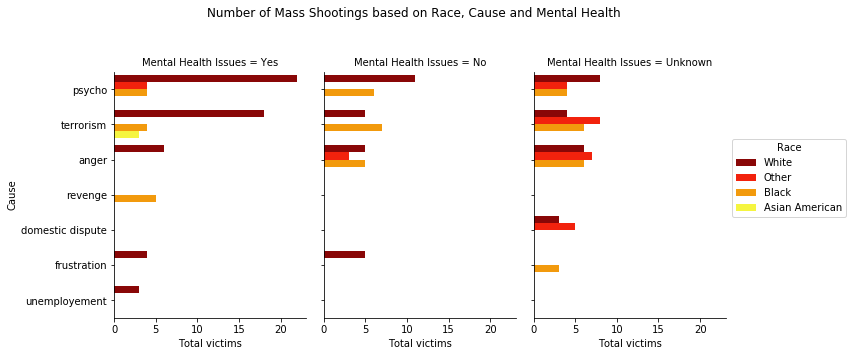

In [136]:
g=sns.factorplot(x='Total victims',y='Cause',col='Mental Health Issues',hue='Race',kind='bar',aspect=0.7,
            data=new_health_cnt[new_health_cnt['Total victims'] > 2],col_wrap=3,palette='hot',saturation=0.9,size=5)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Number of Mass Shootings based on Race, Cause and Mental Health')

Text(0.5, 0.98, 'Victims impacted during Mass Shootings based on Race, Cause and Mental Health')

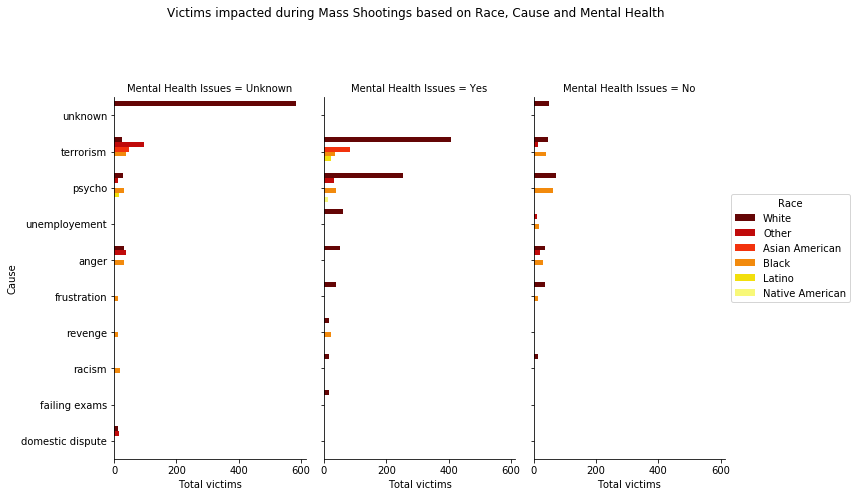

In [137]:
g=sns.factorplot(x='Total victims',y='Cause',col='Mental Health Issues',hue='Race',kind='bar',aspect=0.5,ci=None,
            data=new_health_sum[new_health_sum['Total victims'] > 10],col_wrap=3,palette='hot',saturation=0.9,size=7)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Victims impacted during Mass Shootings based on Race, Cause and Mental Health')

In [138]:
imp_grps=new_data.pivot_table(values=['Total victims'],index=['Shooting_year','Race','Cause'],aggfunc=np.sum)

In [139]:
imp_grps

Total victims
Shooting_year Race           Cause                          
1966          White          terrorism                    54
1971          White          terrorism                     5
1972          Black          psycho                       22
1974          Other          anger                         4
              White          terrorism                    10
1976          White          anger                         8
                             terrorism                     9
1979          White          terrorism                    11
1982          White          psycho                       11
1983          Asian American terrorism                    14
              White          anger                         4
1984          Black          terrorism                    14
              White          psycho                       40
                             revenge                       7
1985          Black          anger                         3
1986          Black          revenge                       5
              White          failing exams                 4
1987          White          psycho                       20
1988          Black          terrorism                     6
              White          frustration                   3
                             psycho                       11
                             revenge                      11
                             terrorism                     8
1989          White          frustration                  20
                             psycho                        4
                             terrorism                    35
1990          Black          psycho                       17
1991          Asian American frustration                   6
                             robbery                       9
              Black          revenge                       3
...                                                      ...
2015          Asian American terrorism                    35
              Black          anger                         9
                             domestic dispute              4
                             psycho                       19
                             revenge                      19
                             terrorism                    22
              Other          domestic dispute             12
                             psycho                       10
                             terrorism                    51
              White          anger                        10
                             psycho                       28
                             racism                        5
                             terrorism                    24
2016          Black          anger                        12
                             frustration                   7
                             psycho                       20
                             racism                       16
                             terrorism                     7
              Other          anger                        32
                             domestic dispute              9
                             psycho                        3
                             terrorism                    44
              White          anger                         4
                             domestic dispute             18
                             psycho                       16
2017          Black          racism                        3
                             unknown                       6
              Latino         terrorism                    11
              White          terrorism                     3
                             unknown                     634

[160 rows x 1 columns]

In [140]:
new_state = pd.DataFrame(new_data[['State','Shooting_year', 'Latitude', 'Longitude', 
                            'Fatalities']][new_data['Fatalities']>0].sort_values(by='Fatalities', ascending=False))
new_state['Desc'] = new_state['State'] + '<br>Year ' + (new_state['Shooting_year']).astype(str) + '<br>Fatalities ' + (new_state['Fatalities']).astype(str)
new_state.head()

,State,Shooting_year,Latitude,Longitude,Fatalities,Desc
3,Nevada,2017,36.181271,-115.134132,59,Nevada<br>Year 2017<br>Fatalities 59
13,Florida,2016,NaN,NaN,49,Florida<br>Year 2016<br>Fatalities 49
220,Virginia,2007,37.229573,-80.413939,32,Virginia<br>Year 2007<br>Fatalities 32
176,Connecticut,2012,41.411908,-73.311963,28,Connecticut<br>Year 2012<br>Fatalities 28
0,Texas,2017,NaN,NaN,26,Texas<br>Year 2017<br>Fatalities 26


## Which state has more mass shootings?

### Figure-1

In [141]:
trace1=go.Scattergeo(locationmode='USA-states',lon = new_state[new_state['Longitude'].notnull()]['Longitude'],
lat = new_state[new_state['Longitude'].notnull()]['Latitude'],text = new_state[new_state['Longitude'].notnull()]['Desc'],
marker=dict(color=new_state['Fatalities'],size=new_state['Fatalities']))
layout=dict(title='Mass shootings in US 1966-2017',geo=dict(projection=dict(type='albers usa'),scope='usa',showland=True))
fig=dict(data=[trace1],layout=layout)
iplot(fig)

### Figure-2

In [142]:
new_state_sum = pd.DataFrame(new_state[['Fatalities','State']].groupby(['State'], as_index=False).sum().sort_values(by='Fatalities',ascending=False))
trace1=go.Bar(x=new_state_sum.State,y=new_state_sum.Fatalities,marker=dict(color='rgba(255, 224, 26, 0.8)'),
             text=new_state_sum.State)
layout=dict(title='Mass state wise shooting')
fig=dict(data=[trace1],layout=layout)
iplot(fig)

##  School Shootings???

### Figure-1

In [143]:
new_school = new_data[['Shooting_year', 'Fatalities', 'Injured', 'Total victims','State','Race','Cause',
                'Mental Health Issues','FTarget', 'Area']][new_data['Area'] == 'School']
new_school.head()

,Shooting_year,Fatalities,Injured,Total victims,State,Race,Cause,Mental Health Issues,FTarget,Area
91,2015,1,3,4,Arizona,White,anger,Unknown,School,School
92,2015,10,7,16,Oregon,Other,terrorism,Unknown,School,School
148,2014,1,3,3,Florida,Black,terrorism,Yes,Random,School
153,2014,1,2,3,Washington,Other,terrorism,Yes,School,School
187,2012,7,3,10,California,Asian American,terrorism,Yes,Random,School


In [144]:
new_school0 = new_school[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year'], as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
new_school1 = new_school[['Shooting_year', 'Fatalities' ]].groupby(['Shooting_year'], as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
new_school2 = new_school[['Shooting_year', 'Injured' ]].groupby(['Shooting_year'], as_index=False).sum().sort_values(by='Shooting_year', ascending=False)
new_school3 = new_school[['Shooting_year', 'Total victims' ]].groupby(['Shooting_year'], as_index=False).count().sort_values(by='Shooting_year', ascending=False)

In [145]:
trace1=go.Scatter(x=new_school0['Shooting_year'],y=new_school0['Total victims'],
                  mode='lines+markers',marker=dict(color='rgba(0, 199, 36, 1)'),name='Total victims')
trace2=go.Scatter(x=new_school1['Shooting_year'],y=new_school1['Fatalities'],
                  mode='lines',marker=dict(color='rgba(46, 0, 199, 1)'),name='Fatalities')
trace3=go.Scatter(x=new_school2['Shooting_year'],y=new_school2['Injured'],
                  mode='lines+markers',marker=dict(color='rgba(199, 0, 0, 1)'),name='Injured')
trace4=go.Scatter(x=new_school3['Shooting_year'],y=new_school3['Total victims'],
                  mode='lines',marker=dict(color='rgba(199, 0, 143, 1)'),name='Count of Total victims')
data=[trace1,trace2,trace3,trace4]
layout=dict(title='Mass Shootings Stats in Schools')
fig=dict(data=data,layout=layout)
iplot(fig)

### Figure-2

In [146]:
new_sch_target_cnt = new_school[['FTarget', 'Total victims' ]].groupby(['FTarget'], 
                                as_index=False).count().sort_values(by='Total victims', ascending=False)
new_sch_target_sum = new_school[['FTarget', 'Total victims' ]].groupby(['FTarget'], 
                                as_index=False).sum().sort_values(by='Total victims', ascending=False)

In [147]:
trace1=go.Pie(values=new_sch_target_cnt['Total victims'],labels=new_sch_target_cnt['FTarget'],hoverinfo='percent+label+name',
              name='Targets victims count',hole=0.3,domain=dict(x=[0,0.4]))
trace2=go.Pie(values=new_sch_target_sum['Total victims'],labels=new_sch_target_sum['FTarget'],hoverinfo='percent+label+name',
             hole=0.3,name='Total victims sum',domain=dict(x=[0.6,1.0]))
annotations=[dict(showarrow=False,font=dict(size=15),text='Targets victims count',x=0.1,y=-0.1)]
annotations.append(dict(showarrow=False,font=dict(size=15),text='Total victims sum',x=0.8,y=-0.1))
layout=dict(title="School shooters and their Targets",annotations=annotations)
fig=dict(data=[trace1,trace2],layout=layout)
iplot(fig)

Text(0.5, 0.98, 'Victims impacted during Mass Shootings based on Race, Cause and Mental Health')

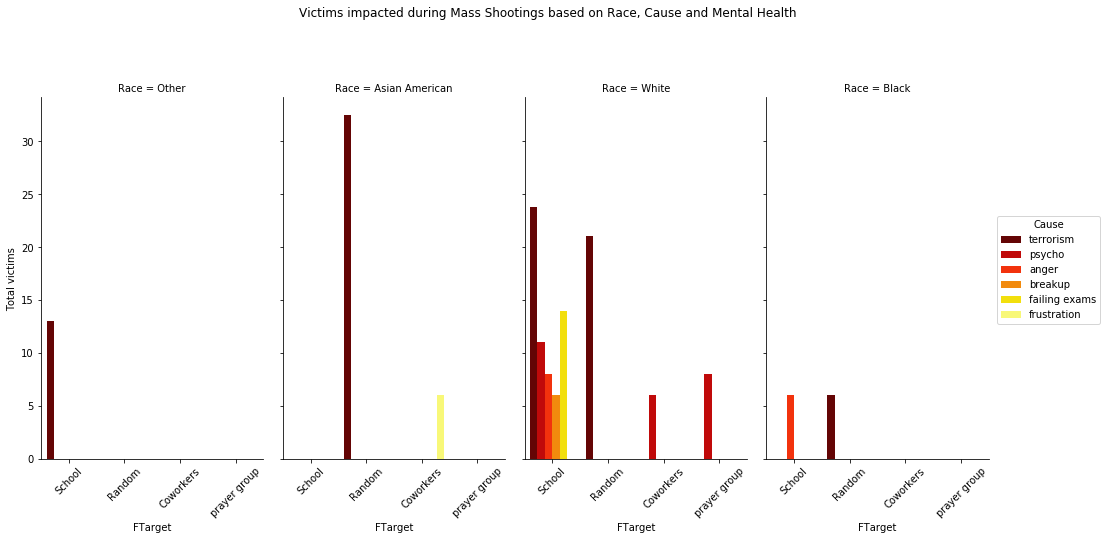

In [148]:
g=sns.factorplot(x='FTarget',y='Total victims',hue='Cause',col='Race',kind='bar',aspect=0.5,ci=None,
            data=new_school[new_school['Total victims'] > 5],col_wrap=4,palette='hot',saturation=0.9,size=7)
plt.subplots_adjust(top=0.8)
g.set_xticklabels(rotation=45)
g.fig.suptitle('Victims impacted during Mass Shootings based on Race, Cause and Mental Health')

In [149]:
new_gender = new_data[['Gender', 'Total victims']].groupby(['Gender'],as_index=False).sum().sort_values(ascending=False, by='Total victims')
new_gender.head()

,Gender,Total victims
1,Male,3096
3,Unknown,98
2,Male/Female,83
0,Female,38


## Impact on Gender in Mass shootings

In [150]:
trace=go.Scatter(x=new_gender['Gender'],y=new_gender['Total victims'],mode='lines+markers',marker=dict(color='rgba(199, 0, 143, 1)'))
layout=dict(title='Mass Shootings and Gender',paper_bgcolor='rgba(102, 112, 255, 1)',plot_bgcolor='aliceblue')
fig=dict(data=[trace],layout=layout)
iplot(fig)

# various paper_bgcolor and plot_bgcolor
           
           aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, saddlebrown, salmon, sandybrown,
            seagreen, seashell, sienna, silver, skyblue,
            slateblue, slategray, slategrey, snow, springgreen,
            steelblue, tan, teal, thistle, tomato, turquoise,
            violet, wheat, white, whitesmoke, yellow,
            yellowgreen